In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
files=os.listdir('../analysis_data/')
files

['census_and_fare',
 'census_and_trips',
 'census_data.csv',
 'community.csv',
 'community_final.csv',
 'comm_area.csv',
 'dropoff_final.csv',
 'dropoff_geoloc.csv',
 'Fare.csv',
 'p1.csv',
 'payment.csv',
 'pay_and_fare.csv',
 'pickup.csv',
 'pickupcensus.csv',
 'pickup_census.csv',
 'pickup_geoloc.csv',
 'time.csv']

In [4]:
file=pd.read_csv('../analysis_data/time.csv',dtype={'Trip Start Timestamp':object,
                                                   'Trip Count':float})
df=pd.DataFrame(file)
df.head()

,Trip Start Timestamp,Trip Count
0,01/01/2013 01:00:00 AM,31.0
1,01/01/2013 01:00:00 PM,12.0
2,01/01/2013 01:15:00 AM,35.0
3,01/01/2013 01:15:00 PM,13.0
4,01/01/2013 01:30:00 AM,67.0


In [5]:
df['Trip Start Timestamp']=df['Trip Start Timestamp'].str.split(" ", n = 1, expand = True)
df.head()

,Trip Start Timestamp,Trip Count
0,01/01/2013,31.0
1,01/01/2013,12.0
2,01/01/2013,35.0
3,01/01/2013,13.0
4,01/01/2013,67.0


In [6]:
gb=df.groupby('Trip Start Timestamp')
trip_count=gb.sum()
trip_count.reset_index(inplace=True)

In [9]:
trip_count['Trip Start Timestamp']=pd.to_datetime(trip_count['Trip Start Timestamp'],yearfirst=True)
trip_count.head()

,Trip Start Timestamp,Trip Count
0,2013-01-01,56953.0
1,2014-01-01,76388.0
2,2015-01-01,78147.0
3,2016-01-01,65468.0
4,2017-01-01,30042.0


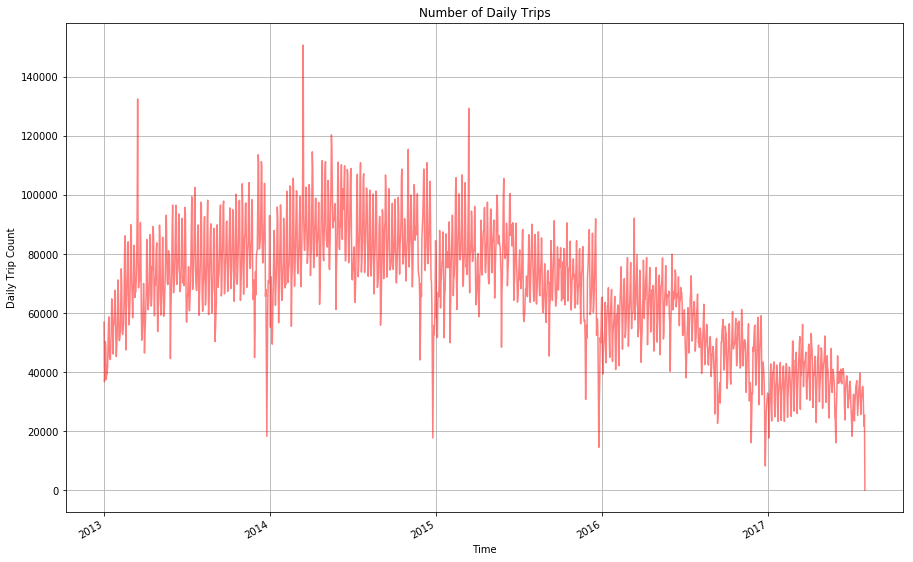

In [13]:
fig=trip_count[['Trip Start Timestamp','Trip Count']].plot(x='Trip Start Timestamp',y='Trip Count',grid=True,
                                                figsize=(15,10),title='Number of Daily Trips',
                                                color='r',legend=False, alpha=0.5,)
plt.xlabel('Time')
plt.ylabel('Daily Trip Count')
plt.savefig('output/dailytrips.png')

In [14]:
trip_count.sort_values(by="Trip Count",ascending=False)

,Trip Start Timestamp,Trip Count
367,2014-03-15,150797.0
371,2013-03-16,132541.0
363,2015-03-14,129398.0
677,2014-05-16,120392.0
682,2014-05-17,116418.0
1431,2014-11-01,115524.0
467,2014-04-04,114655.0
1570,2013-12-06,113662.0
577,2014-04-26,111709.0
1574,2013-12-07,111696.0


In [ ]:
trip_count['Trip Start Timestamp']=pd.to_datetime(trip_count['Trip Start Timestamp'],yearfirst=True)

In [15]:
trip_count['Months']=trip_count['Trip Start Timestamp'].dt.to_period('M')

In [16]:
trip_count[['Months','Trip Count']].sort_values('Months', inplace=True)

C:\Users\nilay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
gb1=trip_count[['Trip Count','Months']].groupby('Months')
trip_final=gb1.sum()
trip_final.reset_index(inplace=True)

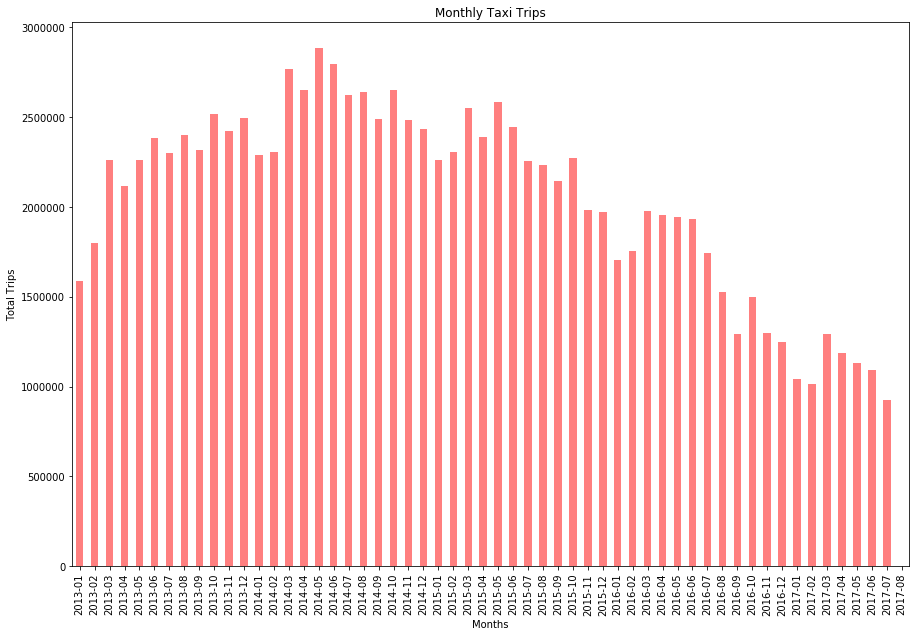

In [19]:
fig=trip_final[['Months','Trip Count']].plot.bar(x='Months',y='Trip Count',
                                                figsize=(15,10),title='Monthly Taxi Trips',
                                                color='r',legend=False, alpha=0.5,)
plt.ylabel('Total Trips')

plt.savefig('output/Trips.png')

In [20]:
help(trip_final.plot.bar)

Help on method bar in module pandas.plotting._core:

bar(x=None, y=None, **kwds) method of pandas.plotting._core.FramePlotMethods instance
    Vertical bar plot.
    
    A bar plot is a plot that presents categorical data with
    rectangular bars with lengths proportional to the values that they
    represent. A bar plot shows comparisons among discrete categories. One
    axis of the plot shows the specific categories being compared, and the
    other axis represents a measured value.
    
    Parameters
    ----------
    x : label or position, optional
        Allows plotting of one column versus another. If not specified,
        the index of the DataFrame is used.
    y : label or position, optional
        Allows plotting of one column versus another. If not specified,
        all numerical columns are used.
    **kwds
        Additional keyword arguments are documented in
        :meth:`pandas.DataFrame.plot`.
    
    Returns
    -------
    axes : matplotlib.axes.Axes or np.